<a href="https://colab.research.google.com/github/pooja-parsana/hotel_booking_analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
#path of  our dataset
file_path='/content/drive/MyDrive/AlmaBetter/Cohort Rimo/Module 1/week 4/Hotel Bookings.csv'
dataframe=pd.read_csv(file_path)

In [5]:
#copy original data frame into another dataframe
df=dataframe.copy()

In [6]:
#diplaying first five rows
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
#displyaing last five rows
df.tail(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119384,City Hotel,0,21,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [8]:
#name of columnsn
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**Hotel**
H1: Resort hotel
H2: City hotel

**is_canceled**
1: Canceled
0: Not canceled

**lead_time**
No of days that elapsed between entering date of booking into property management system and arrival date

**arrival_date_year**
Year of arrival date (2015-2017)

**arrival_date_month**
Month of arrival date (Jan - Dec)

**arrival_date_week_numberr**
Week number of year for arrival date (1-53)

**arrival_date_day_of_month**
Day of arrival date

**stays_in_weekend_nights**
No of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel

**stays_in_week_nights**
No of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel

**Adults**

**Children**

**Babies**

**meal**
Type of meal booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

**country**

**market_segment** (a group of people who share one or more common characteristics, lumped together for marketing purposes)
TA: Travel agents
TO: Tour operators

**distribution_channel** (A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer)
TA: Travel agents
TO: Tour operators

**is_repeated_guest** (value indicating if the booking name was from repeated guest)
1: Yes
0: No

**previous_cancellations**
Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled**
Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type**
Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type**
Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

**booking_changes**
Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type**
Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

**agent**
ID of the travel agency that made the booking

**company**
ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

**day_in_waiting_list**
Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type**
Contract - when the booking has an allotment or other type of contract associated to it;
Group – when the booking is associated to a group;
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
Transient-party – when the booking is transient, but is associated to at least other transient booking

**adr** (average daily rate)
average daily rate =  SumOfAllLodgingTransactionTotalNumberOfStayingNight

**required_car_parking_spaces**
Number of car parking spaces required by the customer

**total_of_special_requests**
Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status**
Canceled – booking was canceled by the customer;
Check-Out – customer has checked in but already departed;
No-Show – customer did not check-in and did inform the hotel of the reason why

**reservation_status_date**
Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [9]:
#datatypes of each columns
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [10]:
#infomation about each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
#statistic al summary of our data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [12]:
#number of columns and rows in data set
df.shape

(119390, 32)

# **To start with the very basic of data cleaning, let's find out if any of the columns have any Null or missing values and replace those with integers.**

In [13]:

df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

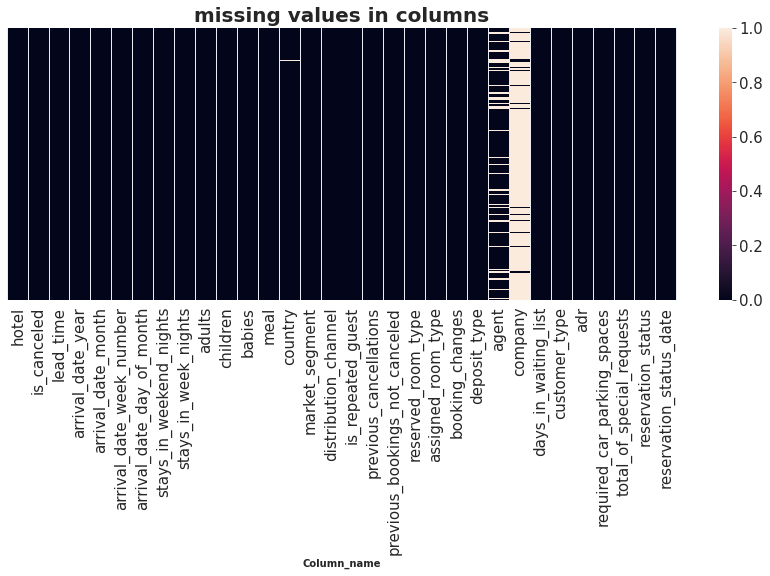

In [17]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cbar=True, yticklabels=False)
plt.xlabel("Column_name",size=10,weight='bold')
plt.title("missing values in columns",fontweight='bold',size=20)
plt.show()

In [18]:
#remove those column which have many number of missing value 
df=df.drop(columns=['agent','company'])

In [19]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [20]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [21]:
#remove those row which have NaN values
df=df.dropna(axis=0)

In [22]:
#Now check our data is ready to processed
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

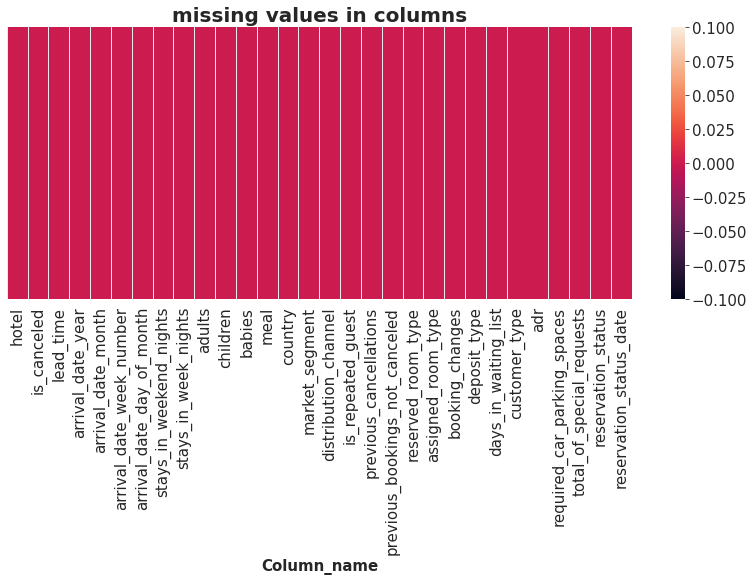

In [23]:
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(),cbar=True, yticklabels=False)
plt.xlabel("Column_name",size=15,weight='bold')
plt.title("missing values in columns",fontweight='bold',size=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


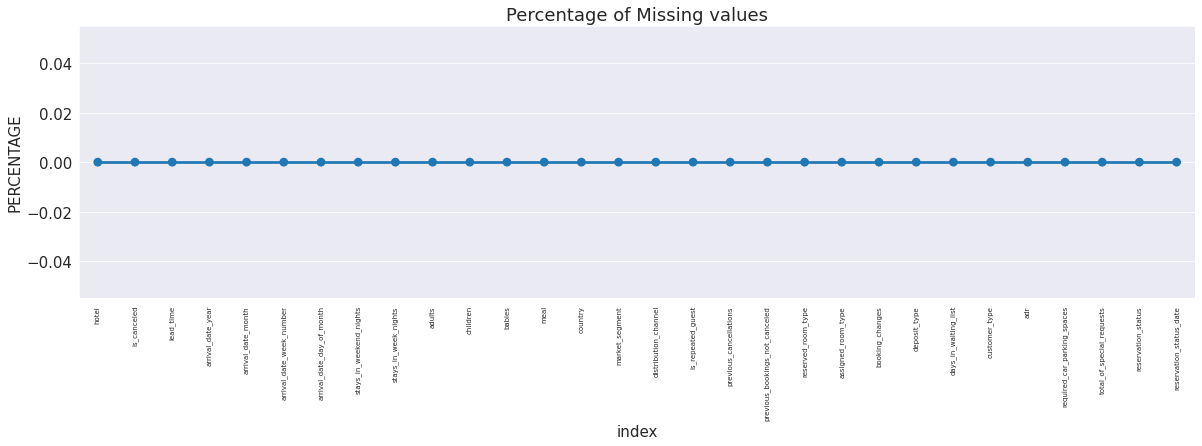

In [24]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(20,5))
ax = sns.pointplot('index',0,data = missing)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## **Calculating and removing outliers**

In [25]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

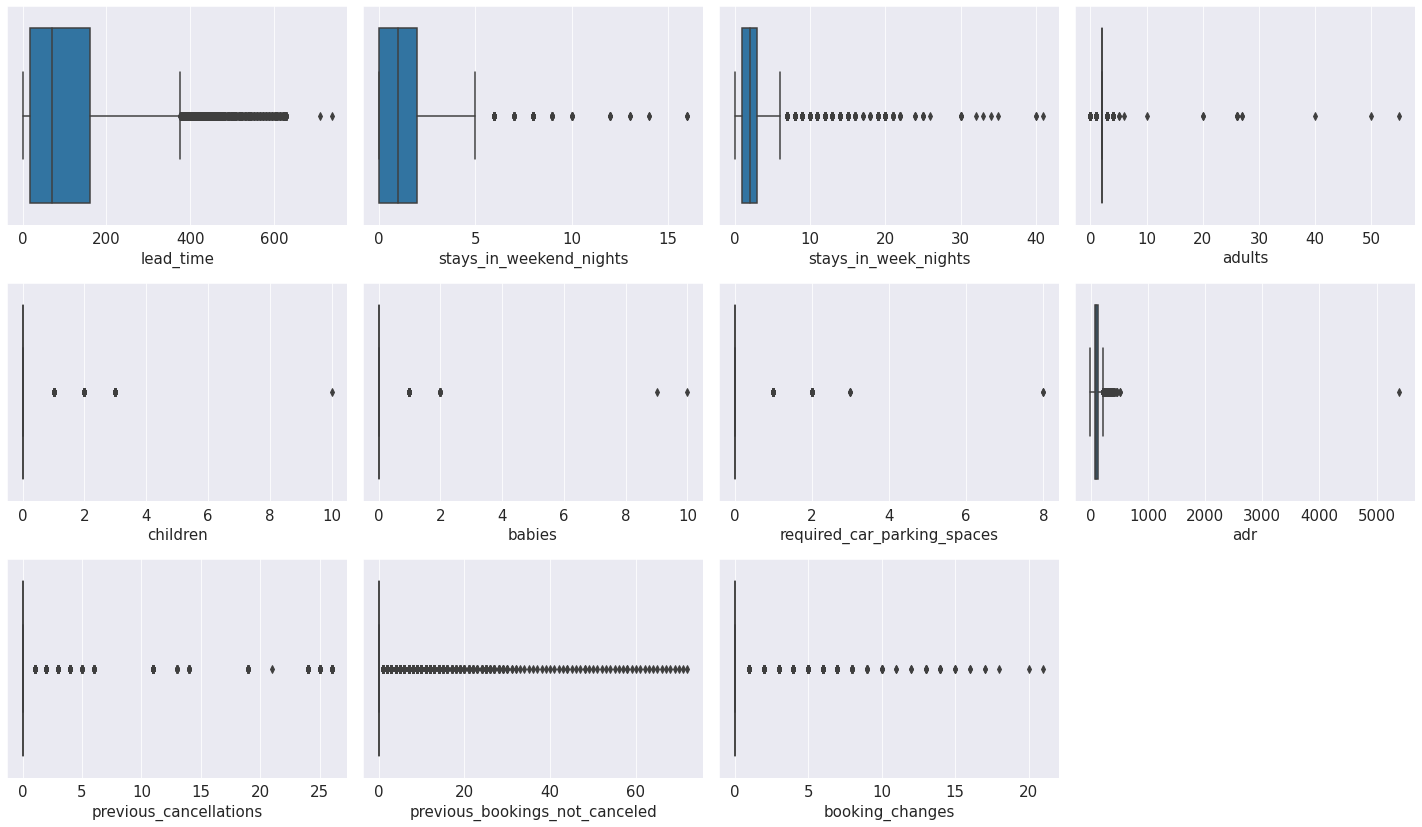

In [26]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

## **Outlier removal**

In [27]:
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000

# **EXPLORATORY DATA ANALYSIS**

## **HOTEL**

In [28]:
df['hotel'].value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

In [29]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

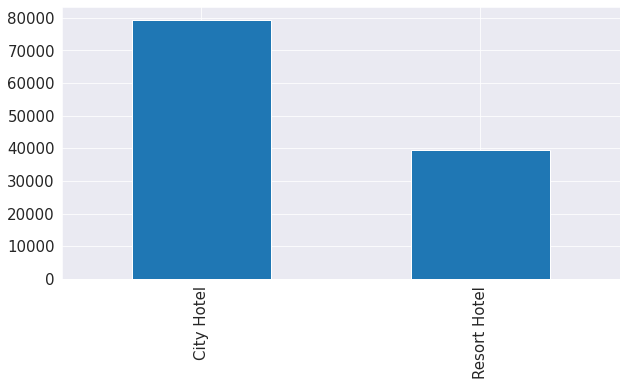

In [30]:
df['hotel'].value_counts().plot(kind='bar')

([<matplotlib.patches.Wedge at 0x7f4c792c0650>,
 [Text(-0.9520945954321745, -0.5509227544300964, 'City Hotel'),
  Text(1.0386485932920646, 0.6010067384417713, 'Resort Hotel')],
 [Text(-0.519324324781186, -0.30050332059823437, '66.7%'),
  Text(0.6058783460870376, 0.35058726409103325, '33.3%')])

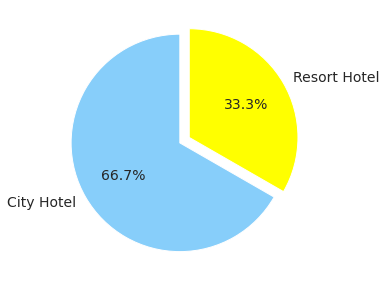

In [31]:
# df['hotel'].value_counts().plot(kind='pie')
explode=(0,0.1)
sizes=df['hotel'].value_counts().tolist()
labels=df['hotel'].value_counts().index.tolist()

colors = ['lightskyblue','yellow']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

*   It seems that a huge proportion of hotels was city hotel. 





**Let's check about cancled booking**

In [32]:
# selecting only those rows which have do not have booking cancellations.
df= df[df.is_canceled == 0]
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [33]:
df['is_canceled'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [34]:
a_df = df[df["is_canceled"] == bool(True)]


(array([0]), <a list of 1 Text major ticklabel objects>)

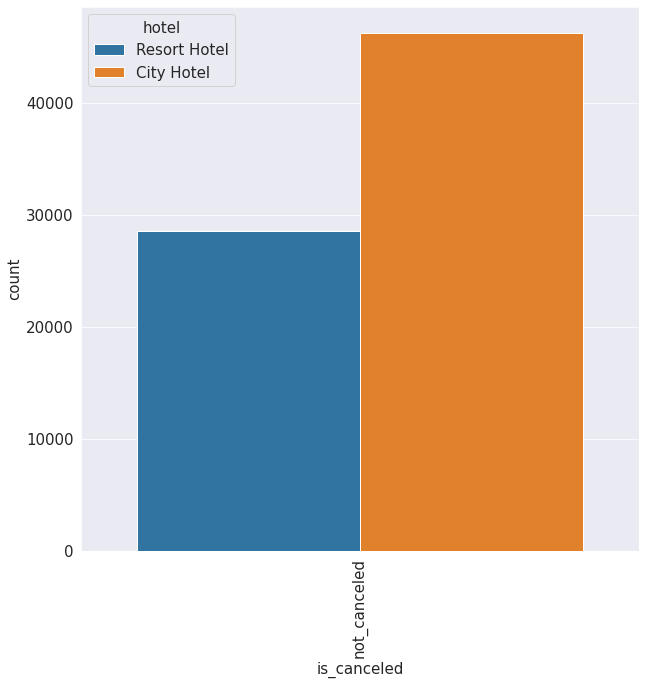

In [35]:
df['is_canceled']=df.is_canceled.replace([1,0],['canceled','not_canceled'])
canceled_data=df['is_canceled']
plt.figure(figsize=(10,10))
sns.countplot(x=canceled_data,data=df,hue= 'hotel')
plt.xticks(rotation=90)






* It seems that majority of bookings were not canceled



**Visualizing proportion of booking cancellations vis a vis bookings**

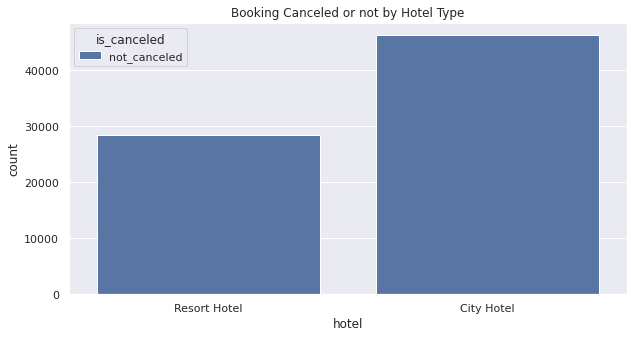

In [37]:
sns.set(style = "darkgrid")
plt.title("Booking Canceled or not by Hotel Type")
ax = sns.countplot(x = "hotel", hue = 'is_canceled', data = df)

## **ARRIVAL PERIOD**

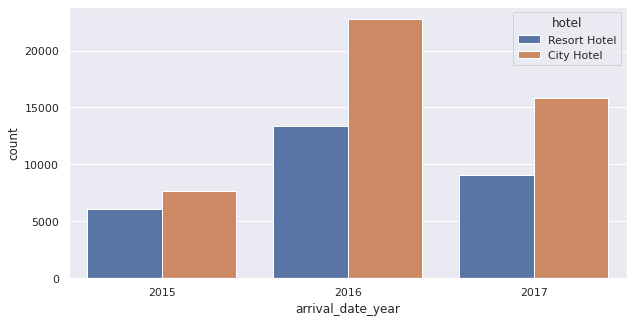

In [38]:
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel')

In [39]:
df.arrival_date_month.value_counts(normalize=True)

August       0.115299
July         0.105586
May          0.095016
October      0.091872
March        0.088180
April        0.087404
June         0.085531
September    0.085183
February     0.071135
November     0.061971
December     0.058399
January      0.054425
Name: arrival_date_month, dtype: float64

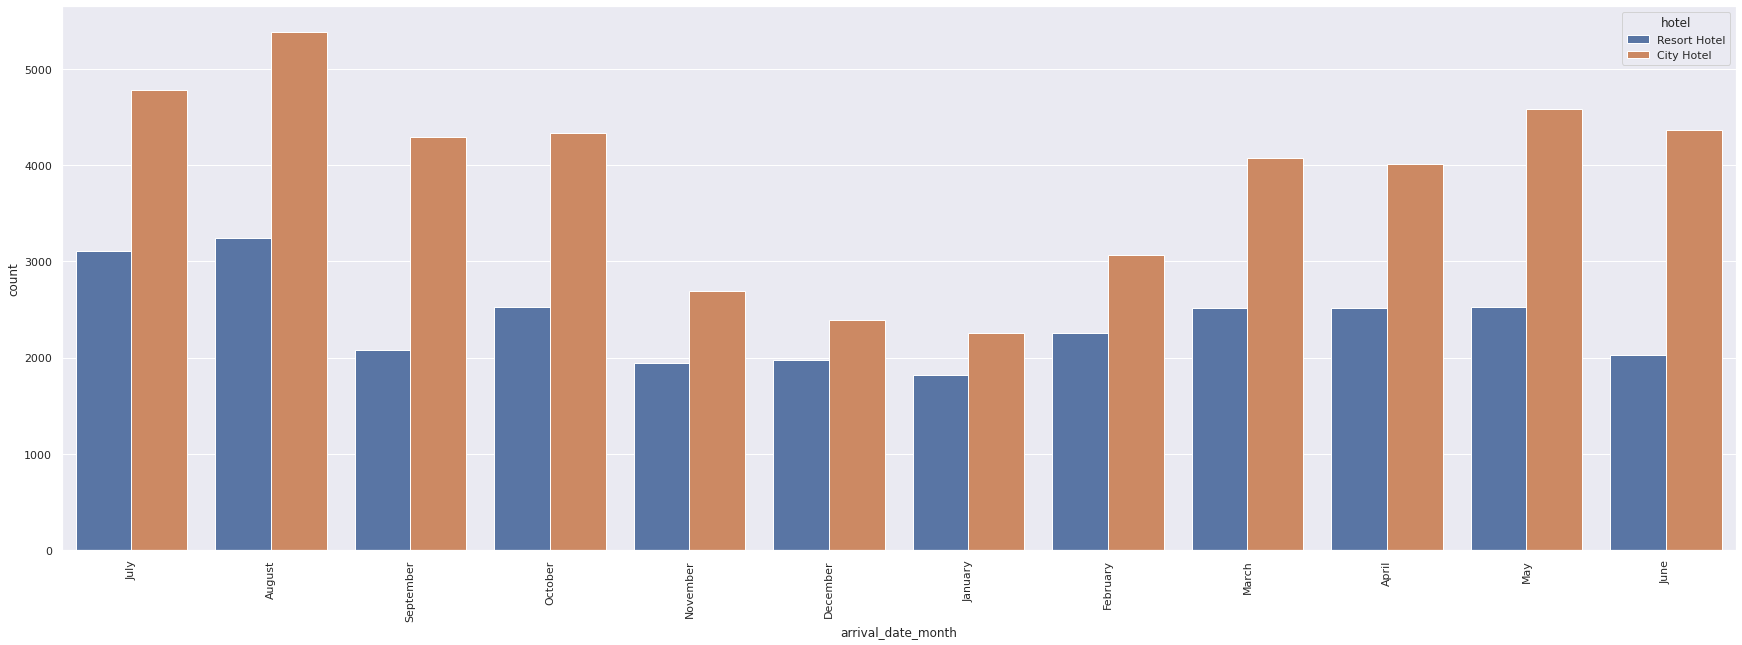

In [40]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['arrival_date_month'],data=df,hue='hotel')
plt.xticks(rotation = 90)
plt.show()

In [41]:
df['arrival_date_week_number'].value_counts()

33    2067
34    1994
32    1876
30    1840
28    1797
21    1789
29    1742
31    1738
42    1675
27    1672
35    1667
15    1631
17    1621
38    1617
41    1606
18    1600
39    1586
20    1565
23    1547
19    1536
22    1530
26    1529
13    1526
44    1508
24    1473
43    1442
11    1442
12    1435
16    1425
14    1421
25    1418
7     1411
8     1411
10    1405
40    1393
9     1382
37    1348
36    1348
47    1296
45    1171
53    1165
48    1121
49    1109
6     1101
46     975
3      965
4      963
5      951
50     900
52     836
2      819
1      691
51     669
Name: arrival_date_week_number, dtype: int64

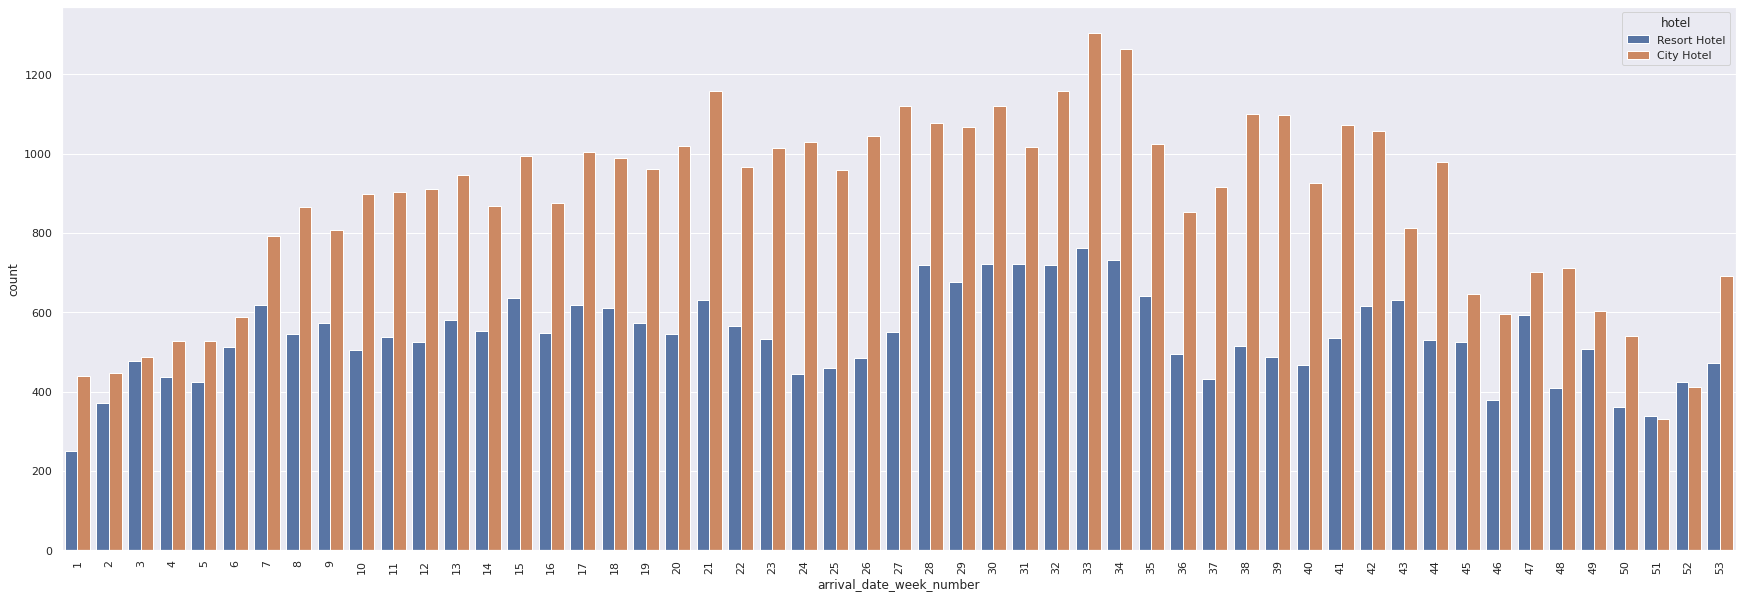

In [42]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['arrival_date_week_number'],data=df,hue='hotel')
plt.xticks(rotation=90)
plt.show()

In [43]:
df['stays_in_weekend_nights'].value_counts()

0    32219
2    20784
1    19528
4     1252
3      810
5      152
Name: stays_in_weekend_nights, dtype: int64

## **Over view of arrival period**

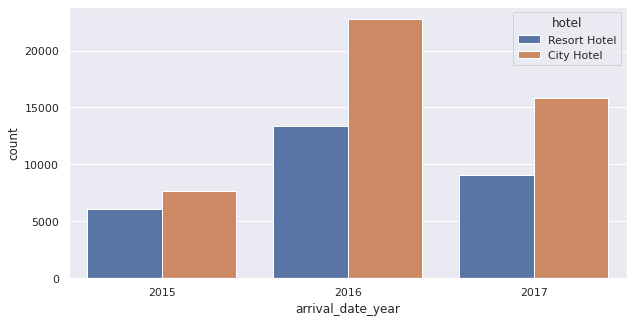

In [44]:
lst=['hotel','arrival_date_year','arrival_date_month','arrival_date_day_of_month']
period_arrival=df[lst]
sns.countplot(data=period_arrival,x='arrival_date_year',hue="hotel")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

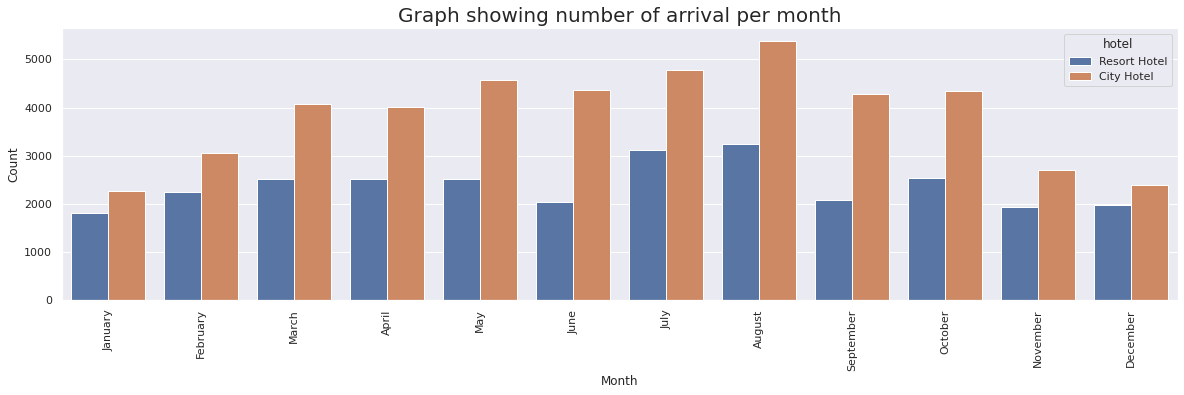

In [45]:
plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90)



*   I can see that in year of 2016 and 2017 hotel booking is at its heighest. 
*   And the booking around the month f August being the heighest.
*   That's why it seems that the summer period is a peak period for hotel   bookings.


Text(0.5, 1.0, 'Number of stays on weekend nights')

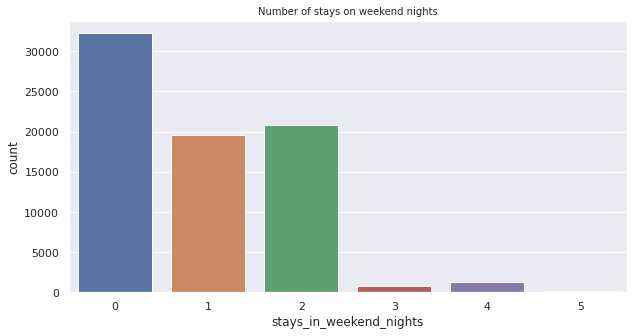

In [46]:
sns.countplot(data = df, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

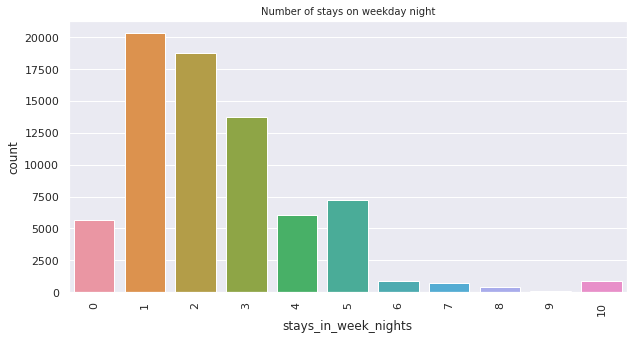

In [47]:
sns.countplot(data=df,x='stays_in_week_nights').set_title('Number of stays on weekday night',fontsize=10)
plt.xticks(rotation=90)


*  It shows that the majority of booking are on weekdays nights




## **VISITORS**

In [48]:
# For adulte,  Using groupby to group according to hotel types only.
df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,46226.0,1.828127,0.536065,0.0,2.0,2.0,2.0,4.0
Resort Hotel,28519.0,1.839405,0.462435,0.0,2.0,2.0,2.0,4.0


Text(0.5, 1.0, 'Number of adults')

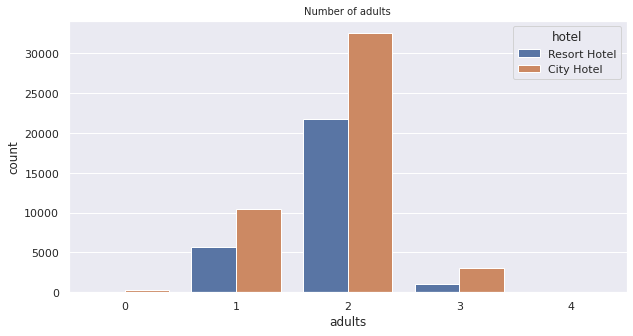

In [49]:
sns.countplot(data=df,x='adults',hue='hotel').set_title('Number of adults',fontsize=10)

In [50]:
#for children

df['children'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,46226.0,0.099900,0.386149,0.0,0.0,0.0,0.0,3.0
Resort Hotel,28519.0,0.107367,0.400279,0.0,0.0,0.0,0.0,3.0


Text(0.5, 1.0, 'number of children')

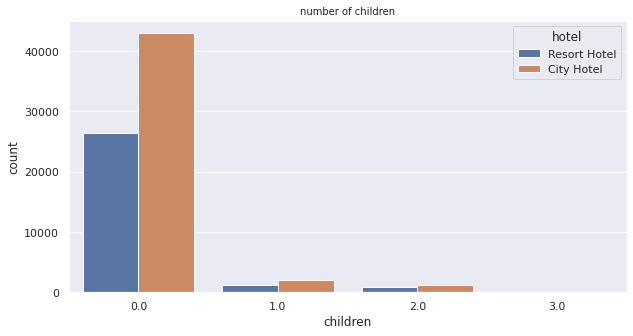

In [51]:
sns.countplot(data=df,x='children',hue='hotel').set_title('number of children',fontsize=10)

In [52]:

# for babies
df['babies'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,46226.0,0.006685,0.083064,0.0,0.0,0.0,0.0,2.0
Resort Hotel,28519.0,0.015709,0.126029,0.0,0.0,0.0,0.0,2.0


Text(0.5, 1.0, 'Number of babies')

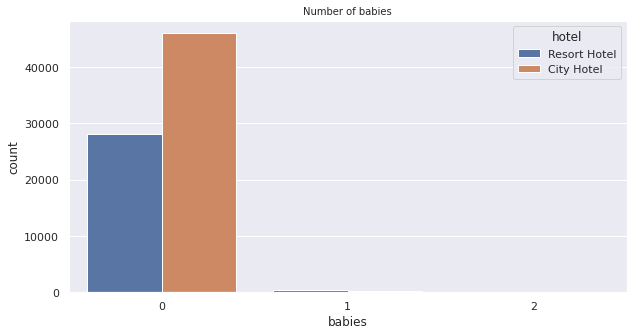

In [53]:
sns.countplot(data=df,x='babies',hue='hotel').set_title('Number of babies',fontsize=10)



*   It seems that majority of visitors are adults(2 members).


## **COUNTRY**

In [54]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'JAM', 'HRV', 'IRN', 'CAF', 'CYP', 'NZL', 'IDN',
       'KAZ', 'THA', 'COL', 'DOM', 'MKD', 'MYS', 'NGA', 'VEN', 'GIB',
       'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR',
       'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'PHL', 'SGP', 'BDI', 'URY',
       'SAU', 'KWT', 'LBN', 'AND', 'VNM', 'AZE', 'PLW', 'ARE', 'QAT',
       'EGY', 'PER', 'SVK', 'MDV', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL',
       'UZB', 'NPL', 'BHS', 'PAK', 'MAC', 'TGO', 'TWN', 'HKG', 'DJI',
       'GEO', 'TUN', 'STP', 'SEN', 'KNA', 'ETH', 'IRQ', 'RWA', 'LIE',
       'MMR', 'PAN', 

In [55]:
# by above graph we can see that most of booking are not canceleddf.country.value_counts()
df.country.value_counts()

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: country, Length: 165, dtype: int64

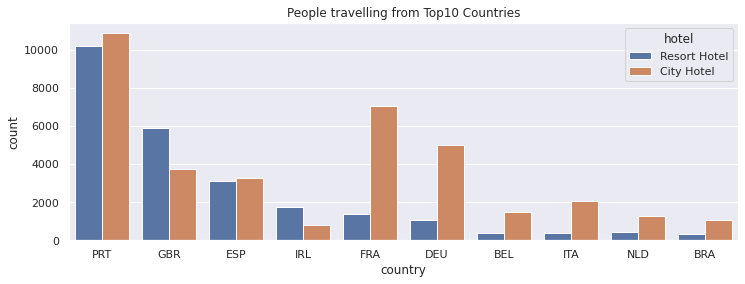

In [57]:
# So we get the top 10 country and we will add them into a new column known as Country column

top10 = df[df['country'].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL","BEL","BRA","NLD"])]

# Lets plot our results

plt.figure(figsize=(12,4))
sns.countplot(x='country', hue = 'hotel', data= top10)
plt.title('People travelling from Top10 Countries')
plt.show()




*   We have a huge number of visitors from Portugal.



In [58]:
df['meal'].value_counts()

BB           57411
HB            9453
SC            6682
Undefined      879
FB             320
Name: meal, dtype: int64

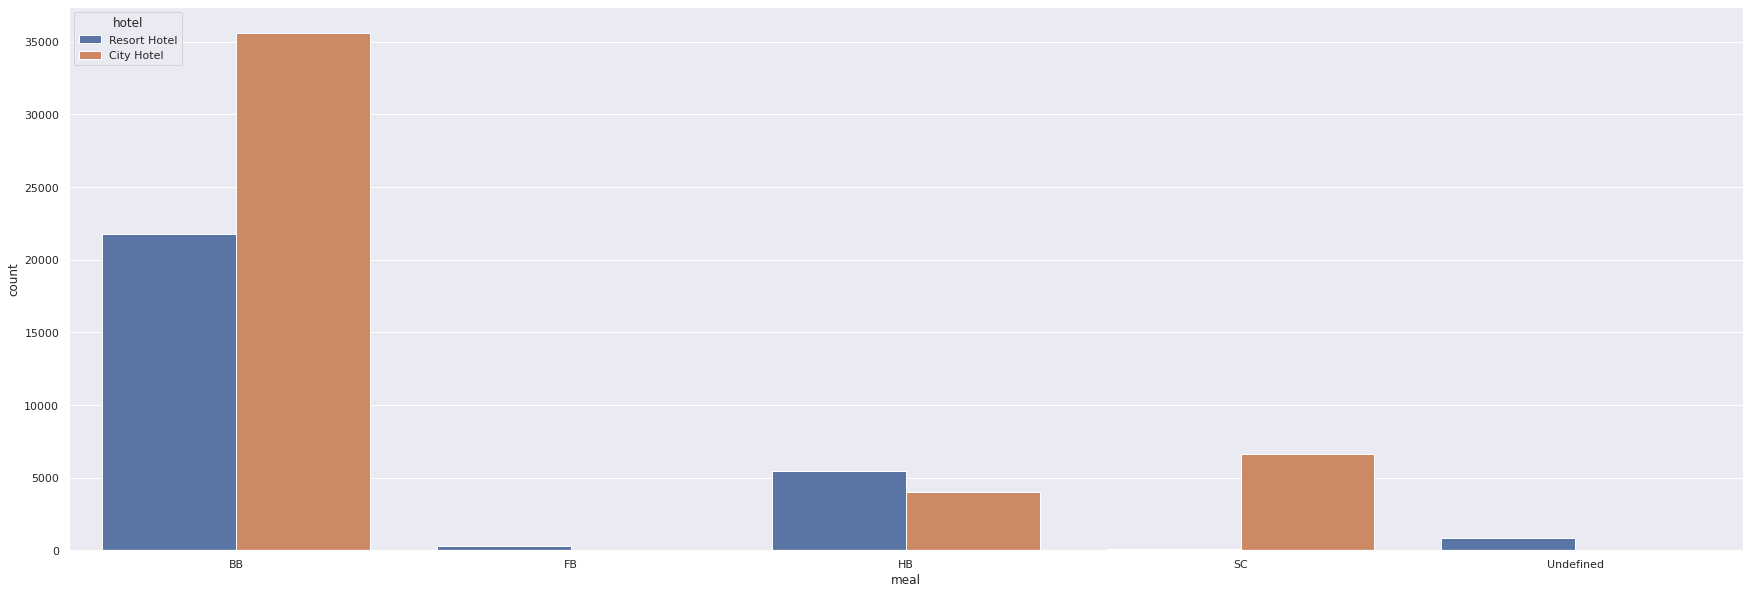

In [59]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['meal'],data=df,hue='hotel')
plt.show()




*   We can see that most preferd meal is BB(brakefast with bread)



In [60]:
df['market_segment'].value_counts()

Online TA        35664
Offline TA/TO    15882
Direct           10528
Groups            7709
Corporate         4133
Complementary      644
Aviation           185
Name: market_segment, dtype: int64

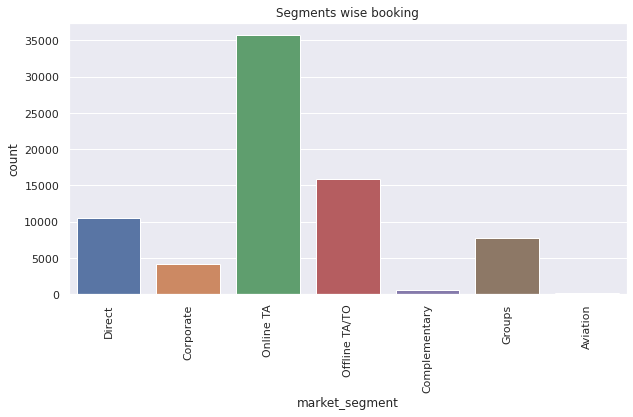

In [61]:

plt.title("Segments wise booking")
ax = sns.countplot(x = "market_segment", data = df)
plt.xticks(rotation = 90)
plt.show()

In [62]:
df['distribution_channel'].value_counts()

TA/TO        57611
Direct       11940
Corporate     5037
GDS            156
Undefined        1
Name: distribution_channel, dtype: int64

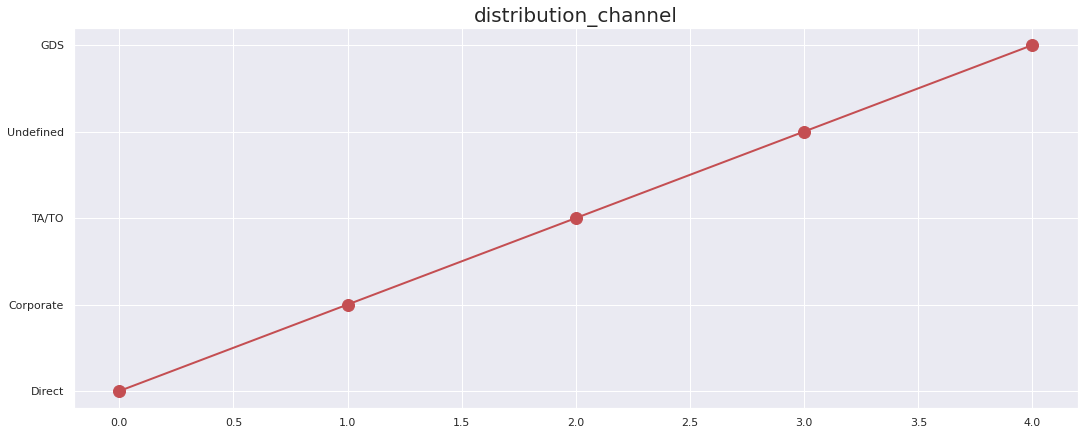

In [63]:


s1 = df['distribution_channel'].unique()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(s1, color='r', marker='o', linewidth= 2, markersize = 12)

plt.title("distribution_channel", fontsize = 20)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


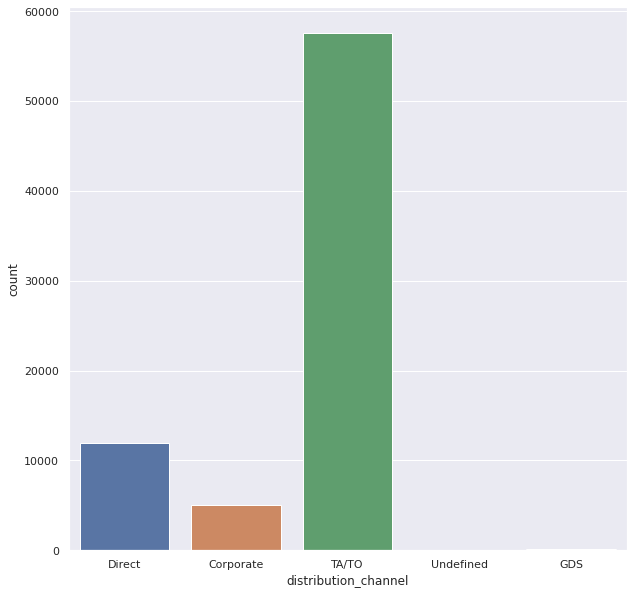

In [64]:
plt.figure(figsize=(10,10))
sns.countplot(df['distribution_channel'])
plt.show()



*   Majority of the distribution channels and market segments involve travel agencies (online or offline).



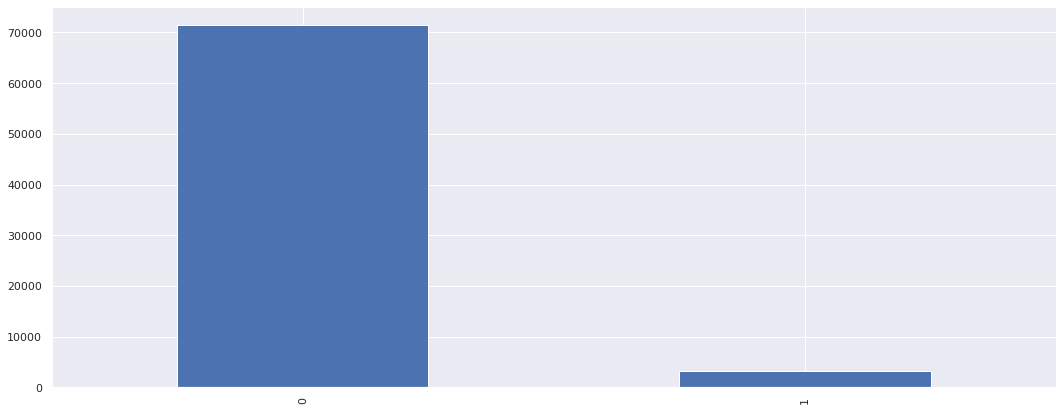

In [65]:
df['is_repeated_guest'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


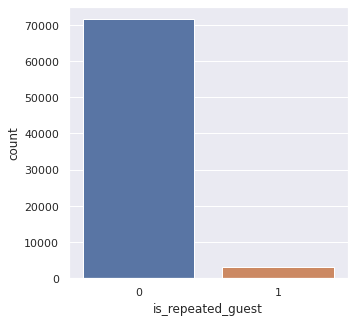

In [66]:
plt.figure(figsize=(5,5))
sns.countplot(df['is_repeated_guest'])
plt.show()



*   Here we can say that low number of repeated gaust are there.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


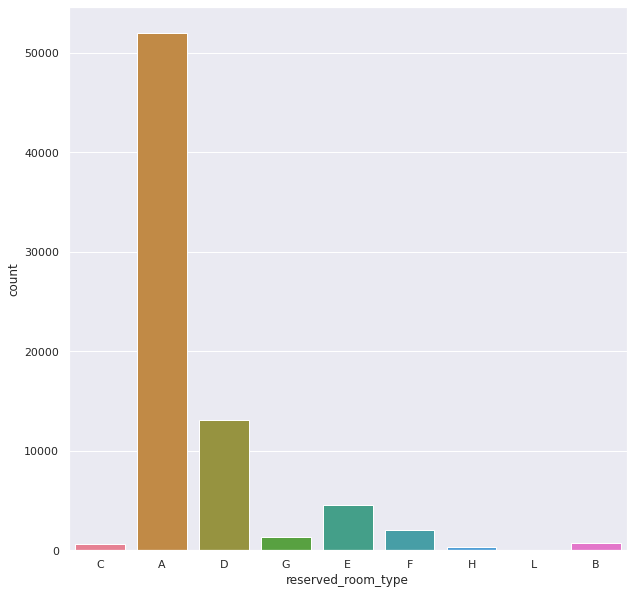

In [67]:
plt.figure(figsize=(10,10))
sns.countplot(df['reserved_room_type'], palette='husl')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


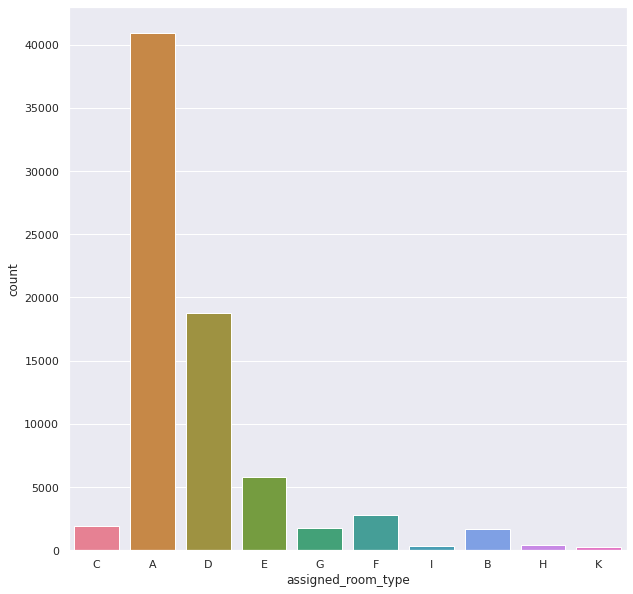

In [68]:
plt.figure(figsize=(10,10))
sns.countplot(df['assigned_room_type'], palette='husl')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


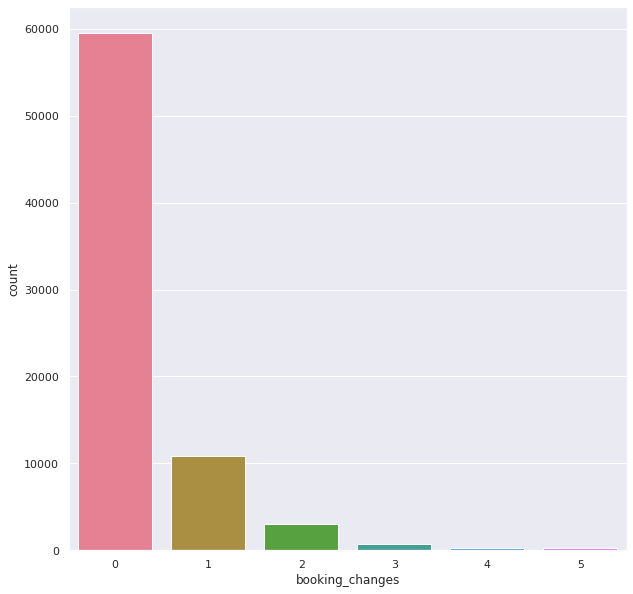

In [69]:

plt.figure(figsize=(10,10))
sns.countplot(df['booking_changes'], palette='husl')
plt.show()

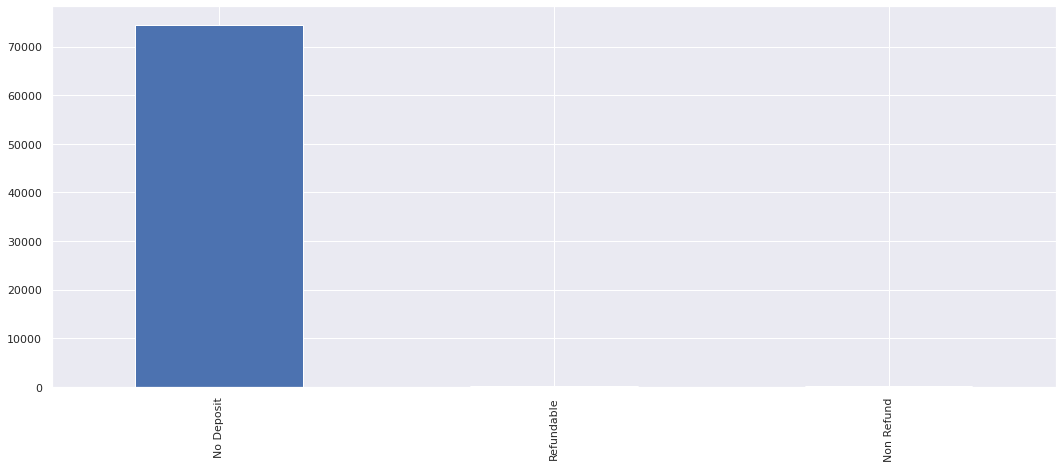

In [70]:

df['deposit_type'].value_counts().plot(kind='bar')




*   It seems that majority of booking does not required deposite



In [71]:
df['customer_type'].value_counts()

Transient          52714
Transient-Party    18705
Contract            2814
Group                512
Name: customer_type, dtype: int64

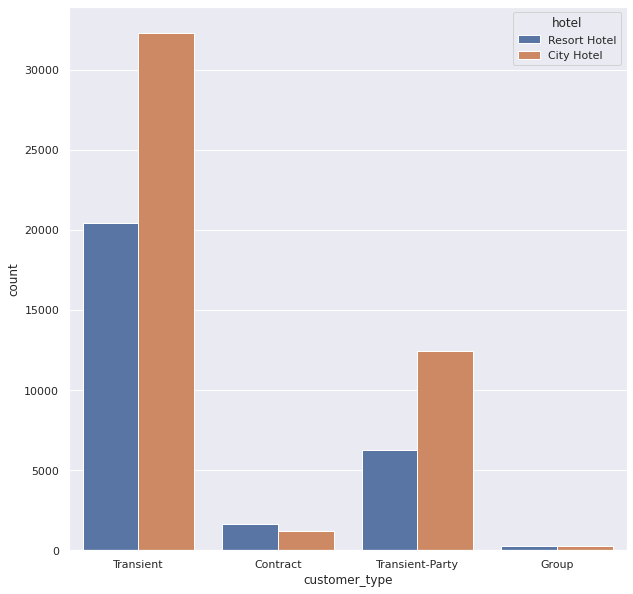

In [72]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['customer_type'],data=df,hue='hotel')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


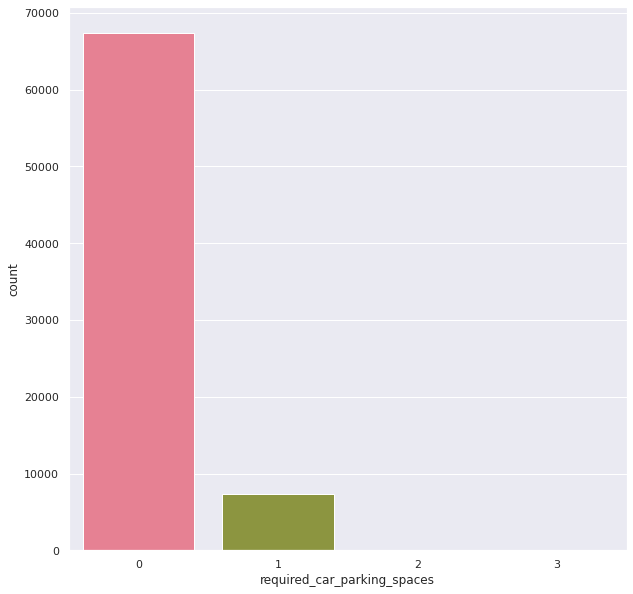

In [73]:
plt.figure(figsize=(10,10))
sns.countplot(df['required_car_parking_spaces'], palette='husl')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


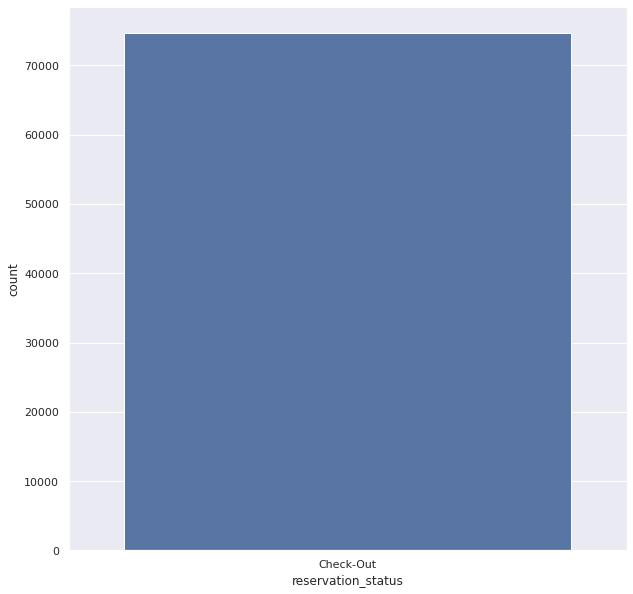

In [74]:
plt.figure(figsize=(10,10))
sns.countplot(df['reservation_status'])
plt.show()



*   It seems that price of resort hotels is much higher then the city hotels



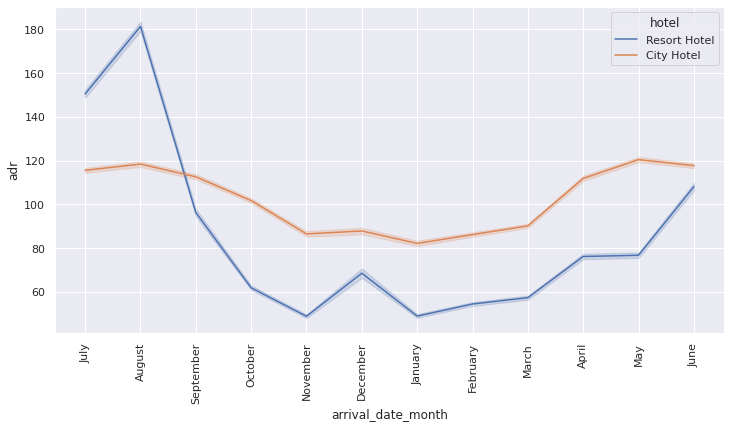

In [75]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.xticks(rotation=90)
plt.show()

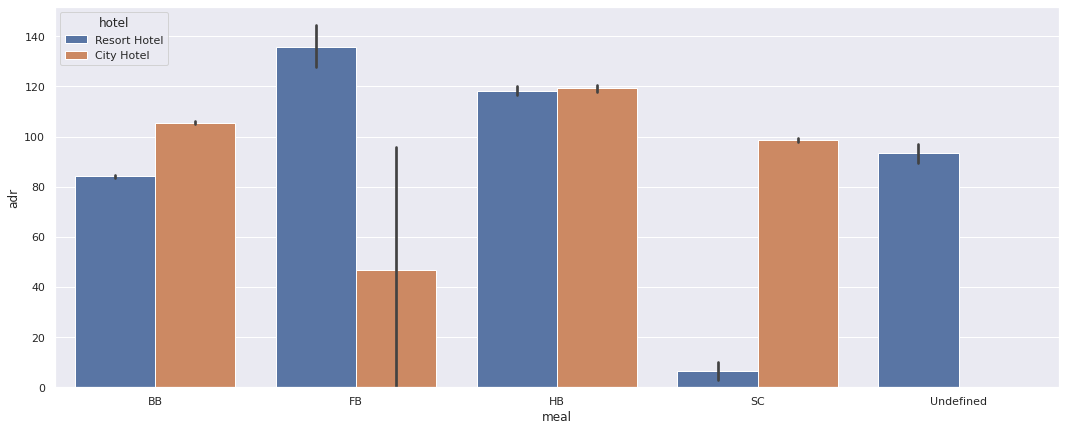

In [76]:
# plotting variation in adr with meal type
sns.barplot(data = df, x = 'meal', y = 'adr', hue = 'hotel')

# **Best time of the year to book a hotel room?**

In [77]:
#best time of year to book a hotel
best_time_of_year=df.arrival_date_year.unique()
best_time_of_year

array([2015, 2016, 2017])

In [78]:
a=df.groupby('hotel').arrival_date_year.unique()
a

hotel
City Hotel      [2015, 2016, 2017]
Resort Hotel    [2015, 2016, 2017]
Name: arrival_date_year, dtype: object

## **Best daily rate**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

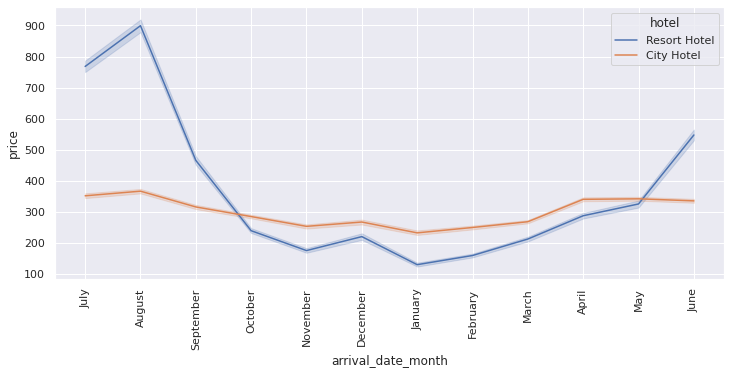

In [79]:
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
actual_guests = df.loc[df["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.xticks(rotation=90)

In [80]:
# df.total_of_special_requests.max()

# **Conclusion**

1. Firstly, higher lead time has higher chance of cancellation. Also, history of previous cancellations increases chances of cancellation.

2. Secondly, The City hotel has more guests during spring and autumn, when the prices are also highest, In July and August there are less visitors, although prices are lower. Thus, customers can get good deal on bookings in July and August in city hotel.

3. Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest. Thus, these months should be avoided for bookings.

4. Thirdly, Broadly, Arpil to August is the peak season of bookings. Both hotels have the fewest guests during the winter.

5. Fourthly, No deposit cancellations are high compared to other categories but these should not be discouraged per se as bookings in this category are also very high compared to non refundable type bookings.

6. Fifthly, cancellations are high when done through agents compared to direct bookings. Hotels need to do marketing and give special incentives for direct bookings as these may establish personal one to one relationships promoting customer loyalty.


